# First exploration

Building on `starter_notebook.ipynb` provided by the competition providers, we will explore a few components of the dataset and formulate an intial approach.

In [62]:
import scipy
import pandas as pd
import os
from os.path import join

import xeek
import xeek.features as features

%matplotlib inline
from importlib import reload
reload(xeek)
reload(features)

<module 'xeek.features' from '/home/goyder/Projects/xeek/xeek/features.py'>

## Data import

In [2]:
df_train = pd.read_csv(xeek.raw_train_filepath, sep=";")

In [3]:
df_train.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
df_test = pd.read_csv(xeek.raw_test_filepath, sep=";")

In [5]:
df_test.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.50000,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.50000,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.50000,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN
3,15/9-14,481.084001,423244.50000,6461862.5,-456.080444,NORDLAND GP.,NaN,19.2031,NaN,1.276094,...,37.304054,NaN,161.170166,NaN,NaN,-0.543943,0.130611,NaN,NaN,NaN
4,15/9-14,481.236001,423244.53125,6461862.5,-456.232422,NORDLAND GP.,NaN,19.2031,NaN,1.204704,...,37.864922,NaN,172.489120,NaN,NaN,-0.542104,0.130611,NaN,NaN,NaN


## Investigations



### Well counts between train and test

How many wells do we have in our test and training datasets?

In [6]:
df_train['WELL'].nunique()

98

In [7]:
df_test['WELL'].nunique()

10

### Feature appearances

From a review of `starter_notebook.ipynb`, it would seem that:

* There are a number of features which are *always present*,
* There are a number of features which are *mostly present, but may have missing values*,
* There are features that are only present in certain well logs.

Let us validate these checks.

In [8]:
ar_missing = (df_train
 .isnull()
 .sum()
 .div(len(df_train))
 .sort_values())

In [9]:
ar_missing

WELL                                 0.000000
DEPTH_MD                             0.000000
FORCE_2020_LITHOFACIES_LITHOLOGY     0.000000
GR                                   0.000000
FORCE_2020_LITHOFACIES_CONFIDENCE    0.000153
GROUP                                0.001092
Z_LOC                                0.009205
X_LOC                                0.009205
Y_LOC                                0.009205
RDEP                                 0.009410
RMED                                 0.033313
DTC                                  0.069084
CALI                                 0.075076
FORMATION                            0.117038
RHOB                                 0.137777
DRHO                                 0.156046
SP                                   0.261650
NPHI                                 0.346090
BS                                   0.416787
PEF                                  0.426155
RSHA                                 0.461218
ROP                               

In [10]:
ar_missing[ar_missing < 0.1]

WELL                                 0.000000
DEPTH_MD                             0.000000
FORCE_2020_LITHOFACIES_LITHOLOGY     0.000000
GR                                   0.000000
FORCE_2020_LITHOFACIES_CONFIDENCE    0.000153
GROUP                                0.001092
Z_LOC                                0.009205
X_LOC                                0.009205
Y_LOC                                0.009205
RDEP                                 0.009410
RMED                                 0.033313
DTC                                  0.069084
CALI                                 0.075076
dtype: float64

We will investigate per well:

In [53]:
f = features.feature_presence_by_well(df_train)

In [63]:
f

DEPTH_MD                             1.000000
X_LOC                                1.000000
Y_LOC                                1.000000
Z_LOC                                1.000000
GROUP                                1.000000
FORMATION                            0.959184
CALI                                 0.908163
RSHA                                 0.500000
RMED                                 0.979592
RDEP                                 1.000000
RHOB                                 0.918367
GR                                   1.000000
SGR                                  0.051020
NPHI                                 0.775510
PEF                                  0.571429
DTC                                  0.959184
SP                                   0.642857
BS                                   0.653061
ROP                                  0.510204
DTS                                  0.214286
DCAL                                 0.224490
DRHO                              

This resultant DF gives us the count of wells for a given feature where the feature is not "mostly missing" - i.e. missing for more than 50% of values. This can be more or less assumed to be totally absent.

A lot of these features are missing on the bulk of our datasets. (`SGR`, for instance, is missing on 93 of 98 wells.)

We will examine the test dataset, too:

In [64]:
f = features.feature_presence_by_well(df_test)

In [65]:
f

DEPTH_MD     1.0
X_LOC        1.0
Y_LOC        1.0
Z_LOC        1.0
GROUP        1.0
FORMATION    1.0
CALI         1.0
RSHA         0.2
RMED         1.0
RDEP         1.0
RHOB         0.9
GR           1.0
SGR          0.0
NPHI         0.8
PEF          0.9
DTC          1.0
SP           0.3
BS           0.7
ROP          0.6
DTS          0.5
DCAL         0.2
DRHO         0.8
MUDWEIGHT    0.1
RMIC         0.2
ROPA         0.6
RXO          0.1
dtype: float64

Reasonably similar distributions, it would seem. (`SGR` is not present on *any* of the test values!)

### Measured depth steps

`DEPTH_MD` is one of the only values that is present across virtually all values. We explore this briefly.

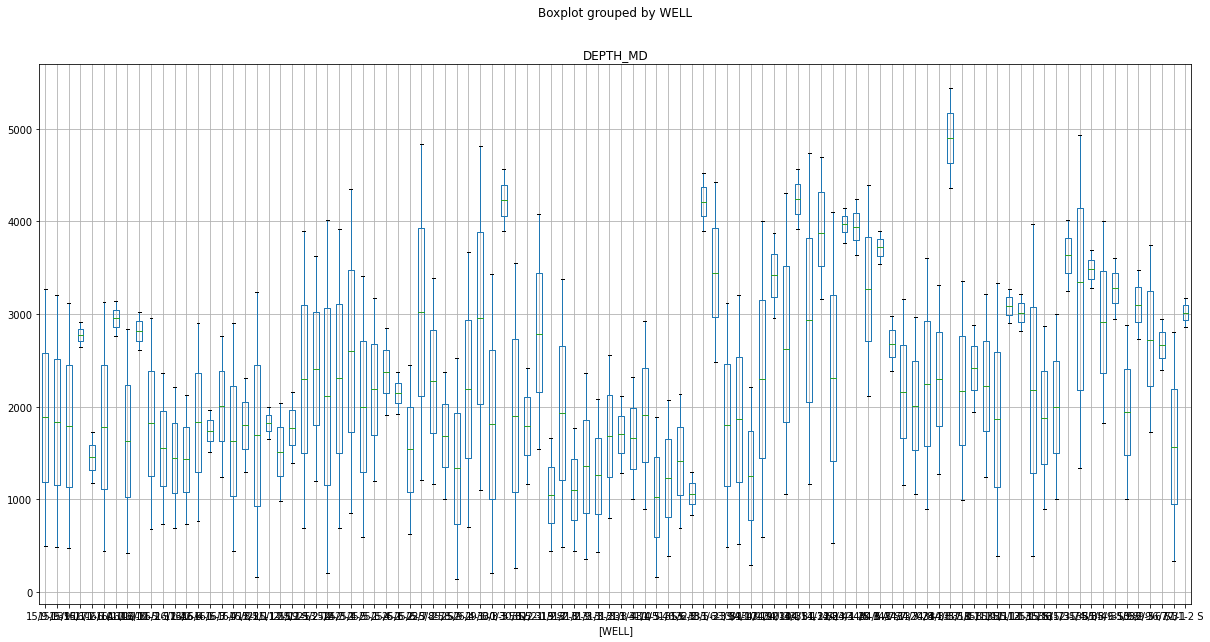

In [14]:
plot_depth_md = (df_train
                 .loc[:, ["WELL", "DEPTH_MD"]]
 .boxplot(by="WELL", figsize=(20, 10)))

array([[<AxesSubplot:title={'center':'DEPTH_MD'}>]], dtype=object)

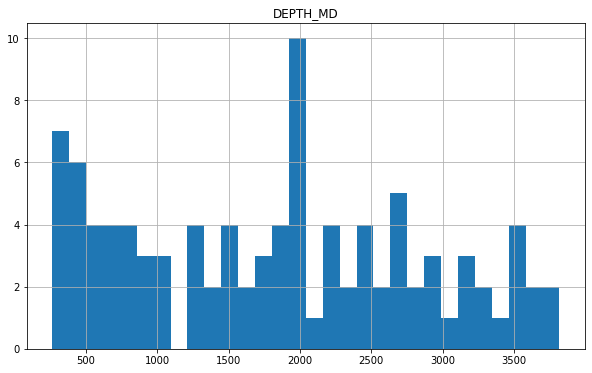

In [35]:
(df_train
.groupby("WELL")
 [["DEPTH_MD"]]
.aggregate(lambda s: max(s) - min(s))
.sort_values("DEPTH_MD")
.hist(bins=30, figsize=(10, 6)))

Looks like there's an enormous range of values - some wells are very deep; some are shallow; some are long; some are short. In fact, there seems to be a sharp split between wells that are ~3km deep and wells that are 200-500m. What's the different between these wells? Do they need different models? Are different features associated? Certainly more digging could be done.